In [44]:
# Active cases -> currently covid positive
# Recovered cases -> recovered from covid
# Deaths -> Died for covid
# Confirmed -> Active + Recovered + Deaths

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv(r'C:\Users\Dr. Strange\Desktop\Arabinda\PYTHON\Projects\Covid_19\covid_19_clean_complete.csv')
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [47]:
# Time series -> forcasting
# AR, MA, ARMA, ARIMA, SARIMA, SARIMAX
# fbprophet

In [48]:
df.shape

(49068, 10)

In [49]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [50]:
# Rename the columns

df.rename(columns = {
    'Province/State' : "state",
    'Country/Region' : "country",
    'Lat' : "lat",
    'Long' : "long",
    'Date' : "date",
    'Confirmed' : "confirmed",
    'Deaths' : "deaths",
    'Recovered' : "recovered",
    'Active' : "active",
    'WHO Region' : "who"
}, inplace = True)

In [51]:
df.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,who
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [52]:
df["date"].max()

'2020-07-27'

In [53]:
df["date"].min()

'2020-01-22'

In [54]:
# Records from the last date  - June 27th
top = df[df["date"] ==  df["date"].max()]
top.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,who
48807,NaN,Afghanistan,33.93911,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.15330,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.03390,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.50630,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.20270,17.873900,2020-07-27,950,41,242,667,Africa


In [55]:
# group by

world = top.groupby("country")[["confirmed", "active", "recovered", "deaths"]].sum().reset_index()
world

,country,confirmed,active,recovered,deaths
0,Afghanistan,36263,9796,25198,1269
1,Albania,4880,1991,2745,144
2,Algeria,27973,7973,18837,1163
3,Andorra,907,52,803,52
4,Angola,950,667,242,41
...,...,...,...,...,...
182,West Bank and Gaza,10621,6791,3752,78
183,Western Sahara,10,1,8,1
184,Yemen,1691,375,833,483
185,Zambia,4552,1597,2815,140


In [56]:
import plotly
import plotly.express as px

In [57]:
figure = px.choropleth(world, locations = "country",
                       locationmode = "country names", color ="active",
                       hover_name = "country", range_color = [1,20000],
                       color_continuous_scale= "reds",
                       title = "Countried with active cases")
figure.show()

In [58]:
# Total confirmed cases in all countries together datewise

total_cases = df.groupby("date")[["confirmed", "active", "recovered", "deaths"]].sum().reset_index()
total_cases

,date,confirmed,active,recovered,deaths
0,2020-01-22,555,510,28,17
1,2020-01-23,654,606,30,18
2,2020-01-24,941,879,36,26
3,2020-01-25,1434,1353,39,42
4,2020-01-26,2118,2010,52,56
...,...,...,...,...,...
183,2020-07-23,15510481,6166006,8710969,633506
184,2020-07-24,15791645,6212290,8939705,639650
185,2020-07-25,16047190,6243930,9158743,644517
186,2020-07-26,16251796,6309711,9293464,648621


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      14664 non-null  object 
 1   country    49068 non-null  object 
 2   lat        49068 non-null  float64
 3   long       49068 non-null  float64
 4   date       49068 non-null  object 
 5   confirmed  49068 non-null  int64  
 6   deaths     49068 non-null  int64  
 7   recovered  49068 non-null  int64  
 8   active     49068 non-null  int64  
 9   who        49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [60]:
total_cases["date"] = pd.to_datetime(total_cases["date"])

In [61]:
total_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       188 non-null    datetime64[ns]
 1   confirmed  188 non-null    int64         
 2   active     188 non-null    int64         
 3   recovered  188 non-null    int64         
 4   deaths     188 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 7.5 KB


Text(0, 0.5, 'Total confirmed cases')

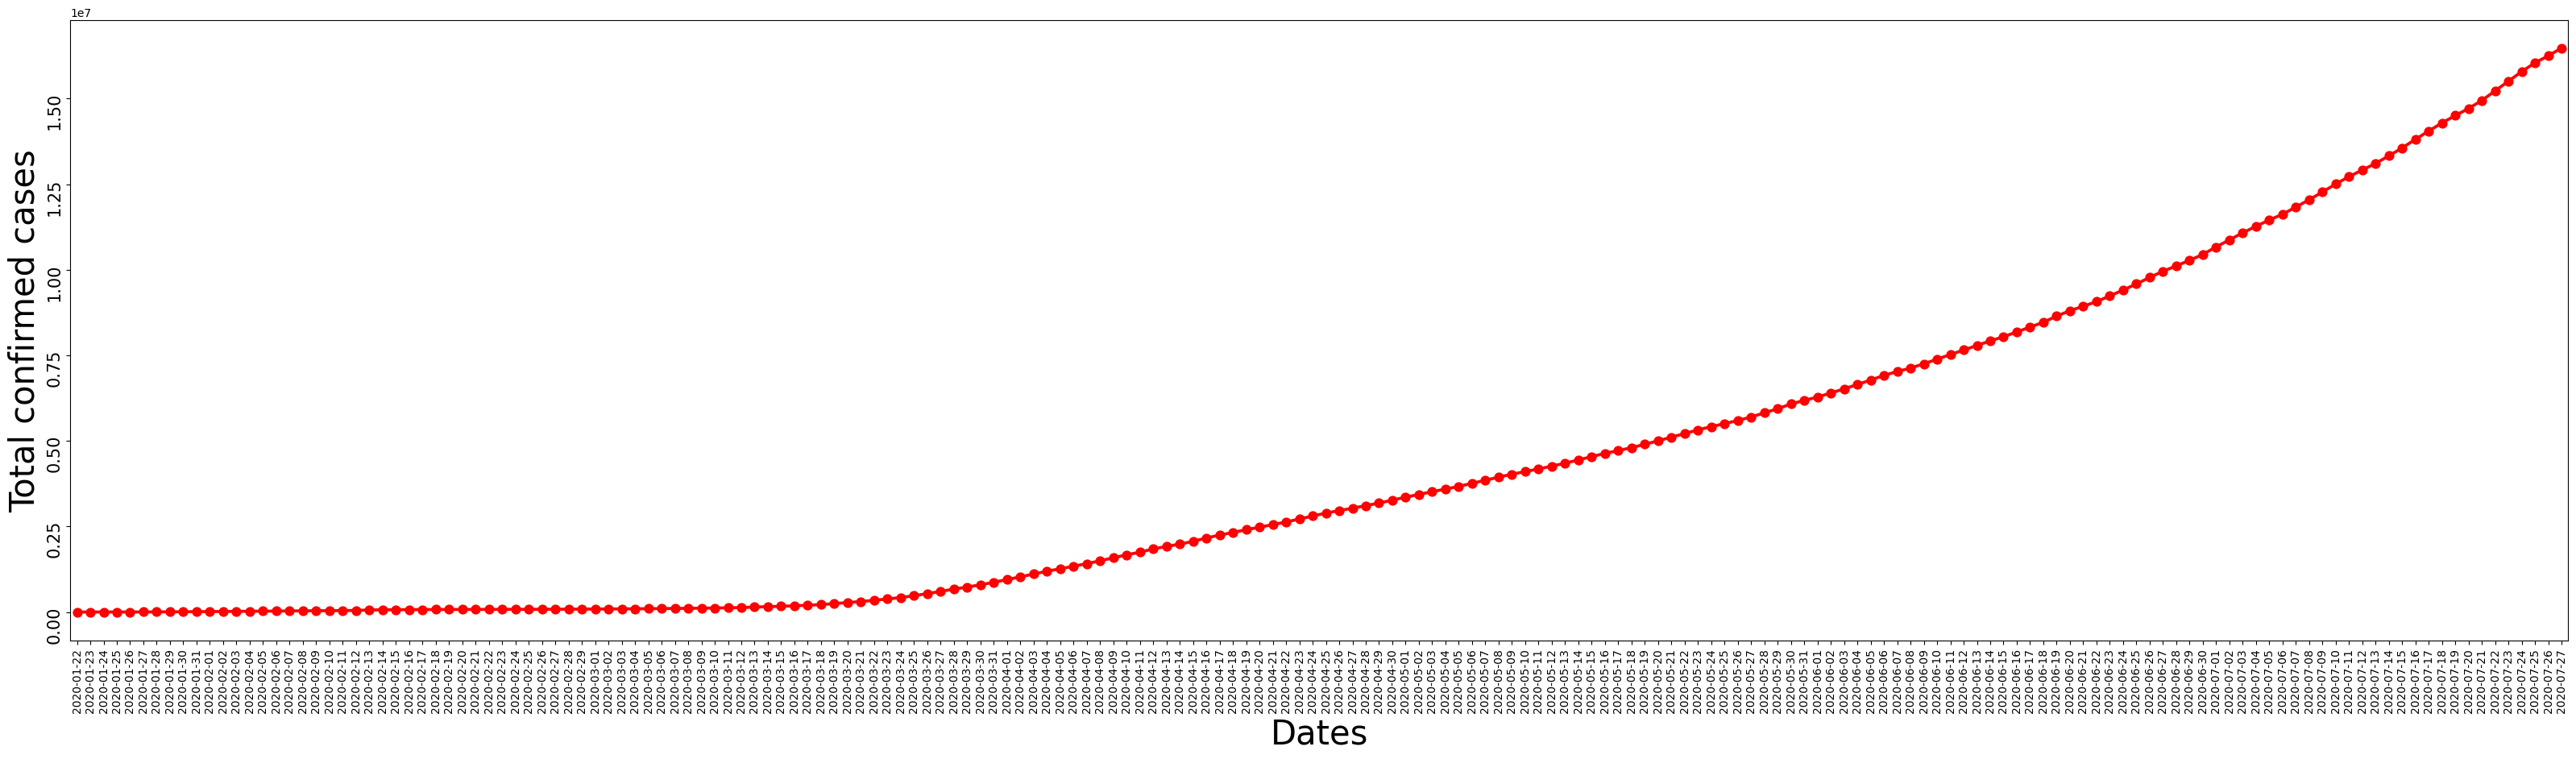

In [62]:
# find the trend of total cases


plt.figure(figsize = (40,10))
ax = sns.pointplot(x = total_cases.date.dt.date, y = total_cases.confirmed, color = "r")
ax.set(xlabel = "Dates", ylabel = "Total cases")

plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(rotation = 90, fontsize = 15)

plt.xlabel("Dates", fontsize = 30)
plt.ylabel("Total confirmed cases", fontsize = 30)

In [63]:
# country wise

df.groupby("country")[["active", "recovered", "deaths"]].sum().reset_index()

,country,active,recovered,deaths
0,Afghanistan,1089052,798240,49098
1,Albania,72117,118877,5708
2,Algeria,345886,755897,77972
3,Andorra,19907,69074,5423
4,Angola,15011,6573,1078
...,...,...,...,...
182,West Bank and Gaza,170967,61124,1370
183,Western Sahara,190,648,63
184,Yemen,25694,23779,17707
185,Zambia,43167,83611,2643


In [64]:
# top 20 countries with highest number of active cases for the last date july 27th 2020

top_actives = top.groupby("country")["active"].sum().sort_values(ascending = False).head(20).reset_index()
top_actives.head(20)

,country,active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
5,South Africa,170537
6,Colombia,117163
7,France,108928
8,Canada,107514
9,Peru,98752


Text(0, 0.5, 'Top 20 countries')

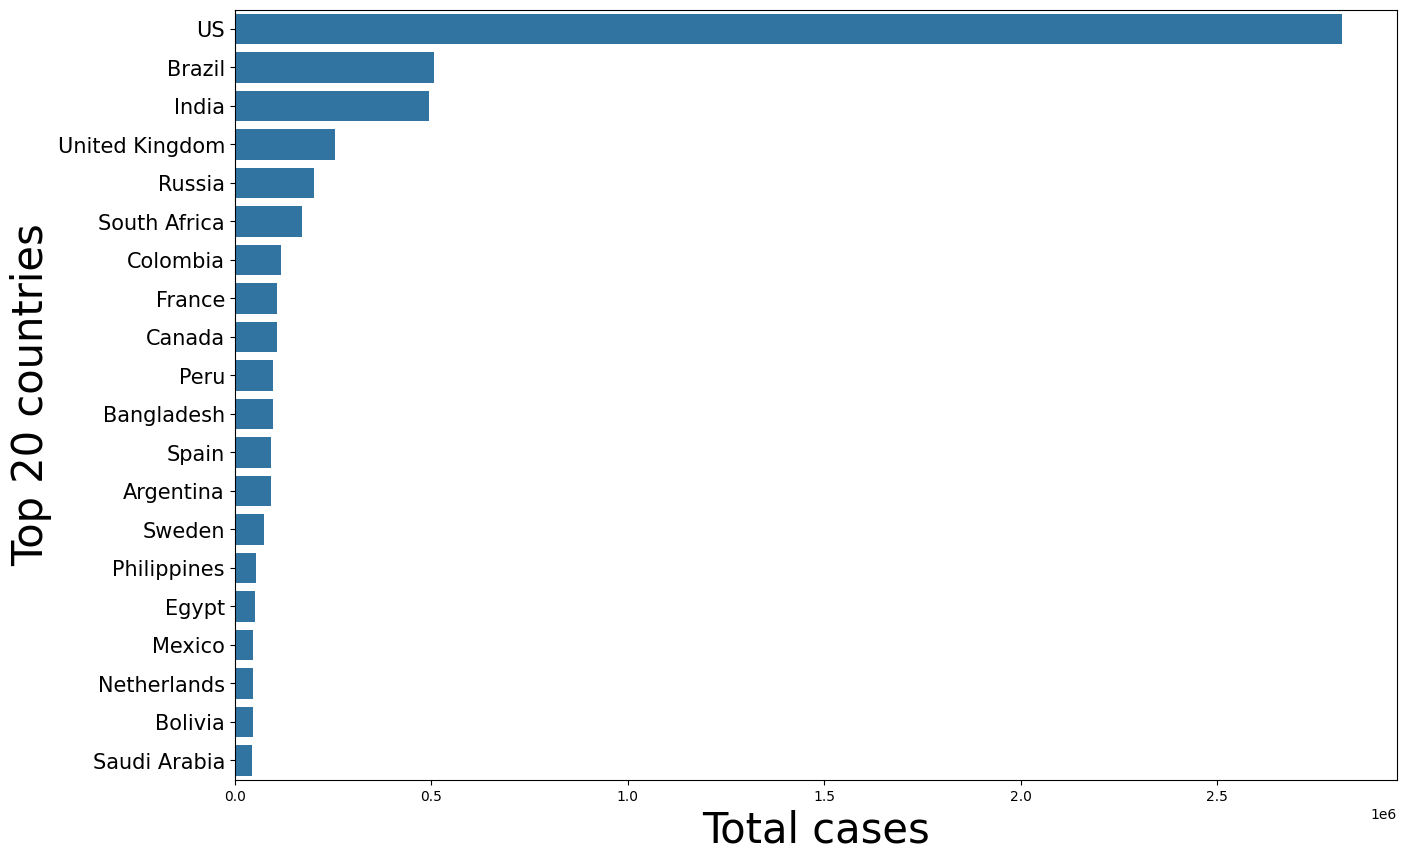

In [65]:
plt.figure(figsize = (15,10))

ax = sns.barplot(x = top_actives.active, y = top_actives.country)
ax.set(xlabel = "Total cases", ylabel = "Country")

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 15)

plt.xlabel("Total cases", fontsize = 30)
plt.ylabel("Top 20 countries", fontsize = 30)

In [66]:
# top 20 countries with highest number of confirmed cases for the last date july 27th 2020

top_confirmed = top.groupby("country")["confirmed"].sum().sort_values(ascending = False).head(20).reset_index()
top_confirmed.head(20)

,country,confirmed
0,US,4290259
1,Brazil,2442375
2,India,1480073
3,Russia,816680
4,South Africa,452529
5,Mexico,395489
6,Peru,389717
7,Chile,347923
8,United Kingdom,301708
9,Iran,293606


Text(0, 0.5, 'Top 20 countries')

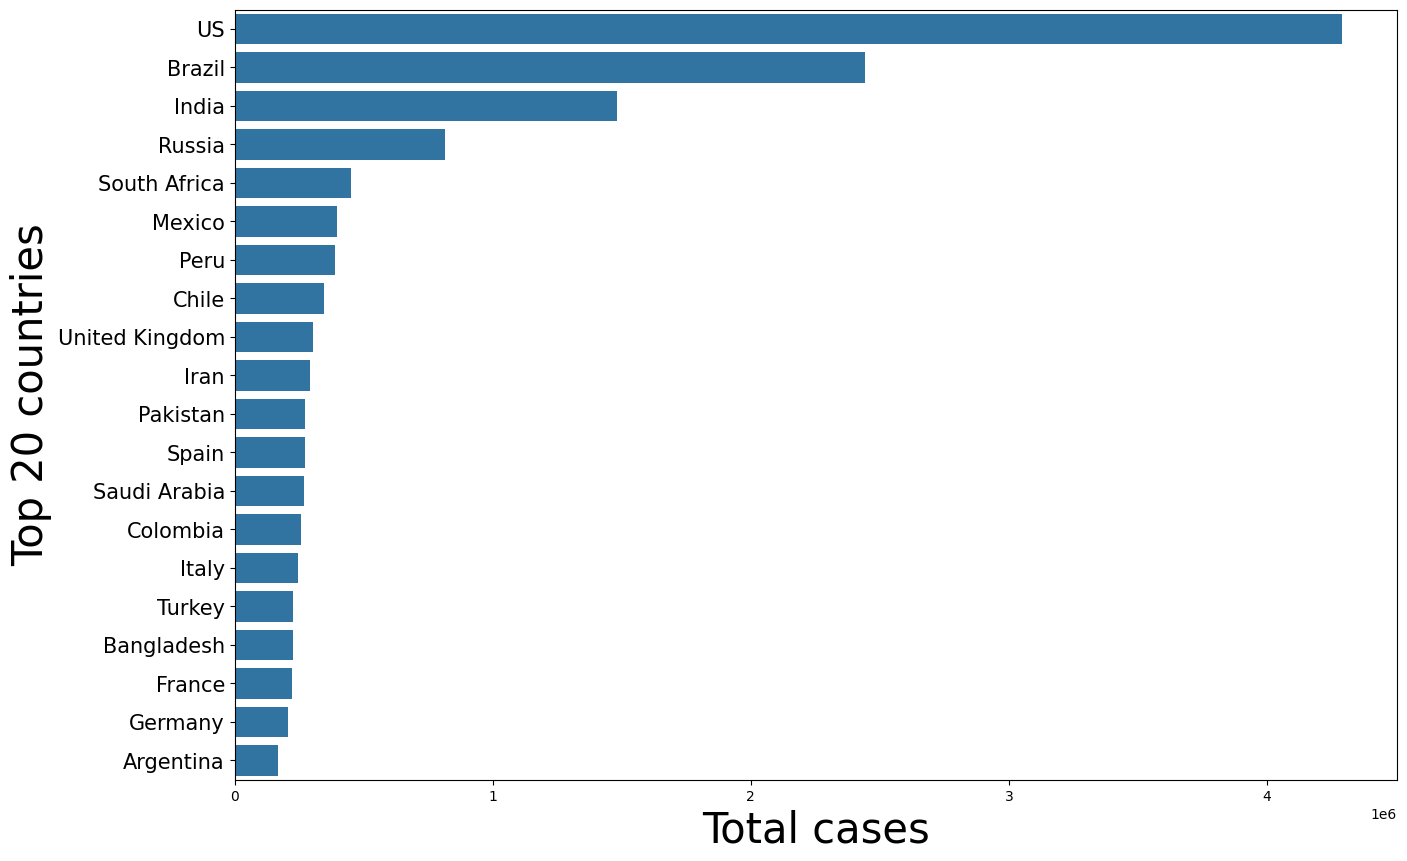

In [67]:
plt.figure(figsize = (15,10))

ax = sns.barplot(x = top_confirmed.confirmed, y = top_confirmed.country)
ax.set(xlabel = "Total cases", ylabel = "Country")

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 15)

plt.xlabel("Total cases", fontsize = 30)
plt.ylabel("Top 20 countries", fontsize = 30)

In [68]:
# top 20 countries with highest number of recovered cases for the last date july 27th 2020

top_recovered = top.groupby("country")["recovered"].sum().sort_values(ascending = False).head(20).reset_index()
top_recovered

,country,recovered
0,Brazil,1846641
1,US,1325804
2,India,951166
3,Russia,602249
4,Chile,319954
5,Mexico,303810
6,South Africa,274925
7,Peru,272547
8,Iran,255144
9,Pakistan,241026


Text(0, 0.5, 'Top 20 countries')

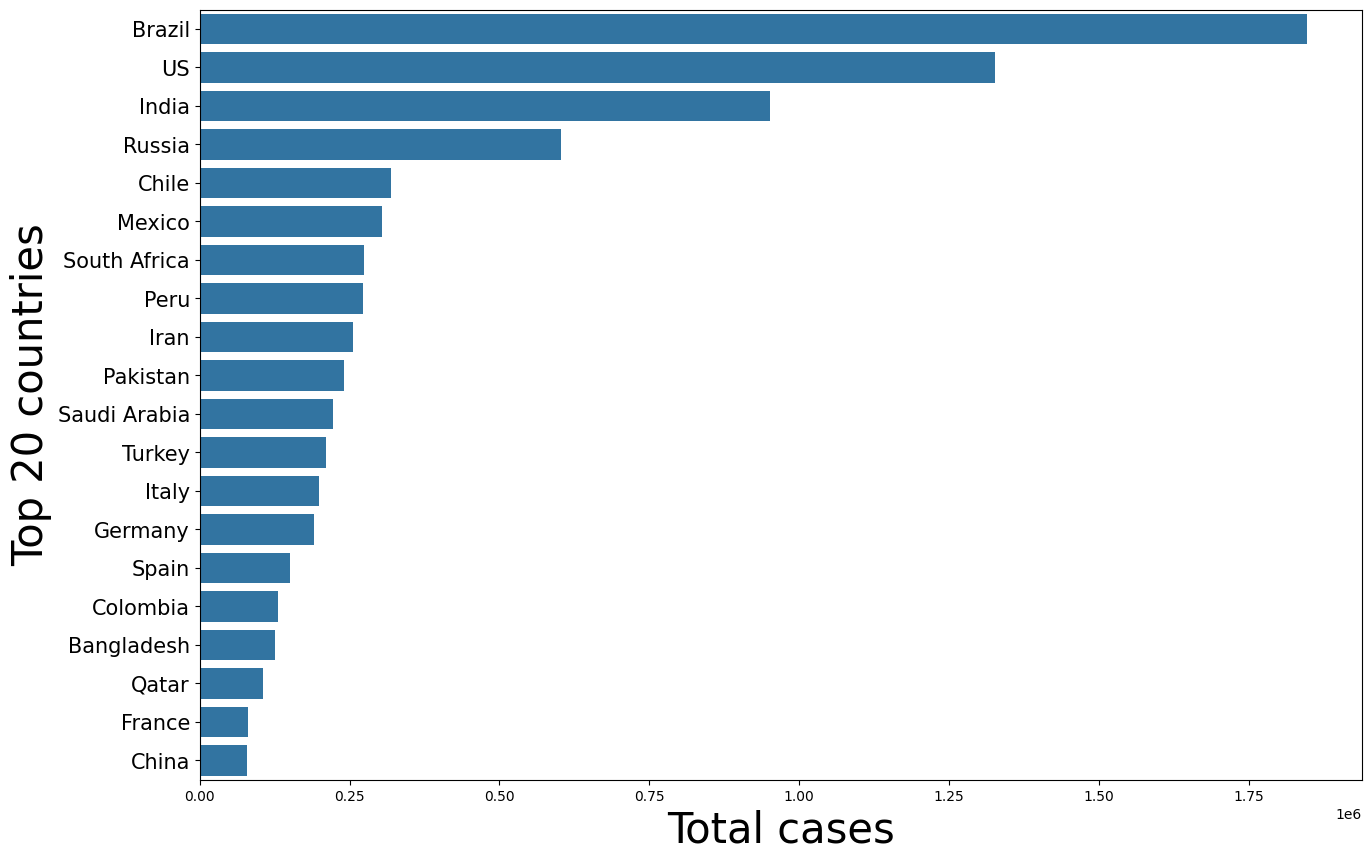

In [69]:
plt.figure(figsize = (15,10))

ax = sns.barplot(x = top_recovered.recovered, y = top_recovered.country)
ax.set(xlabel = "Total cases", ylabel = "Country")

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 15)

plt.xlabel("Total cases", fontsize = 30)
plt.ylabel("Top 20 countries", fontsize = 30)

In [70]:
# top 20 countries with highest number of deaths cases for the last date july 27th 2020

top_deaths = top.groupby("country")["deaths"].sum().sort_values(ascending = False).head(20).reset_index()
top_deaths

,country,deaths
0,US,148011
1,Brazil,87618
2,United Kingdom,45844
3,Mexico,44022
4,Italy,35112
5,India,33408
6,France,30212
7,Spain,28432
8,Peru,18418
9,Iran,15912


Text(0, 0.5, 'Top 20 Countries')

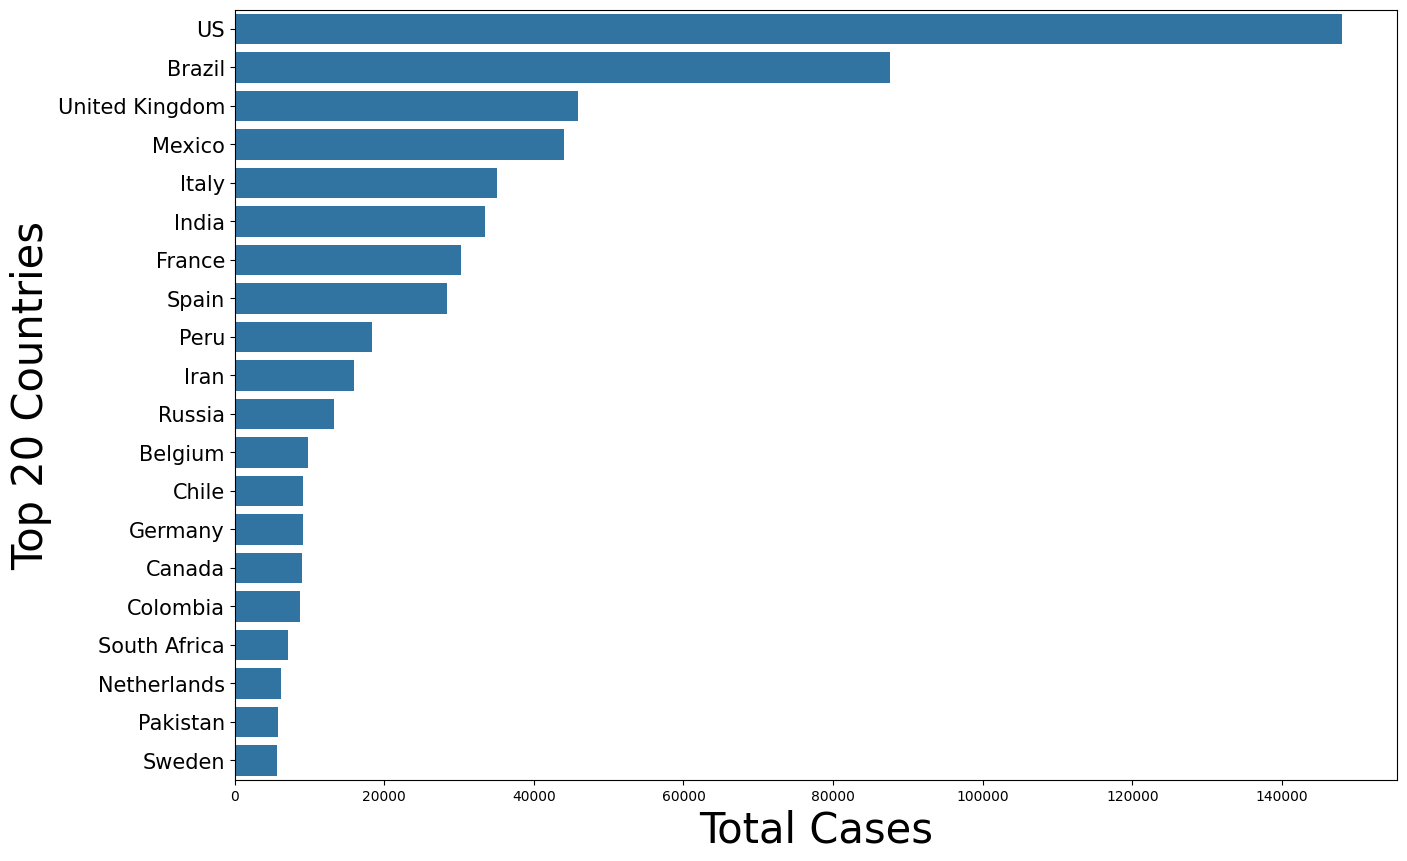

In [71]:
plt.figure(figsize = (15,10))

ax = sns.barplot(x = top_deaths.deaths, y = top_deaths.country)
ax.set(xlabel = "Total Cases", ylabel = "Country")

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 15)

plt.xlabel("Total Cases", fontsize = 30)
plt.ylabel("Top 20 Countries", fontsize = 30)

In [73]:
# US data

us = df[df["country"] == "US"]
us = us.groupby("date")[["active", "recovered", "deaths", "confirmed"]].sum().reset_index()
us

,date,active,recovered,deaths,confirmed
0,2020-01-22,1,0,0,1
1,2020-01-23,1,0,0,1
2,2020-01-24,2,0,0,2
3,2020-01-25,2,0,0,2
4,2020-01-26,5,0,0,5
...,...,...,...,...,...
183,2020-07-23,2661117,1233269,144430,4038816
184,2020-07-24,2705347,1261624,145560,4112531
185,2020-07-25,2753091,1279414,146465,4178970
186,2020-07-26,2789125,1297863,146935,4233923


In [76]:
# Brazil Data

brazil = df[df["country"] == "Brazil"]
brazil = brazil.groupby("date")[["active", "recovered", "deaths", "confirmed"]].sum().reset_index()
brazil

,date,active,recovered,deaths,confirmed
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,583080,1620313,84082,2287475
184,2020-07-24,564914,1693214,85238,2343366
185,2020-07-25,522705,1785359,86449,2394513
186,2020-07-26,519174,1812913,87004,2419091


In [78]:
# India Data

india = df[df["country"] == "India"]
india = india.groupby("date")[["active", "recovered", "deaths", "confirmed"]].sum().reset_index()
india

,date,active,recovered,deaths,confirmed
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,440298,817209,30601,1288108
184,2020-07-24,456234,849432,31358,1337024
185,2020-07-25,468002,885573,32060,1385635
186,2020-07-26,485277,917568,32771,1435616


In [79]:
df["country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Greenland', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ind

In [82]:
# China data

china = df[df["country"] == "China"]
china = china.groupby("date")[["active", "recovered", "deaths", "confirmed"]].sum().reset_index()
china

,date,active,recovered,deaths,confirmed
0,2020-01-22,503,28,17,548
1,2020-01-23,595,30,18,643
2,2020-01-24,858,36,26,920
3,2020-01-25,1325,39,42,1406
4,2020-01-26,1970,49,56,2075
...,...,...,...,...,...
183,2020-07-23,2695,78701,4649,86045
184,2020-07-24,2807,78745,4650,86202
185,2020-07-25,2916,78813,4652,86381
186,2020-07-26,3056,78862,4652,86570


Text(0, 0.5, 'Confirmed cases')

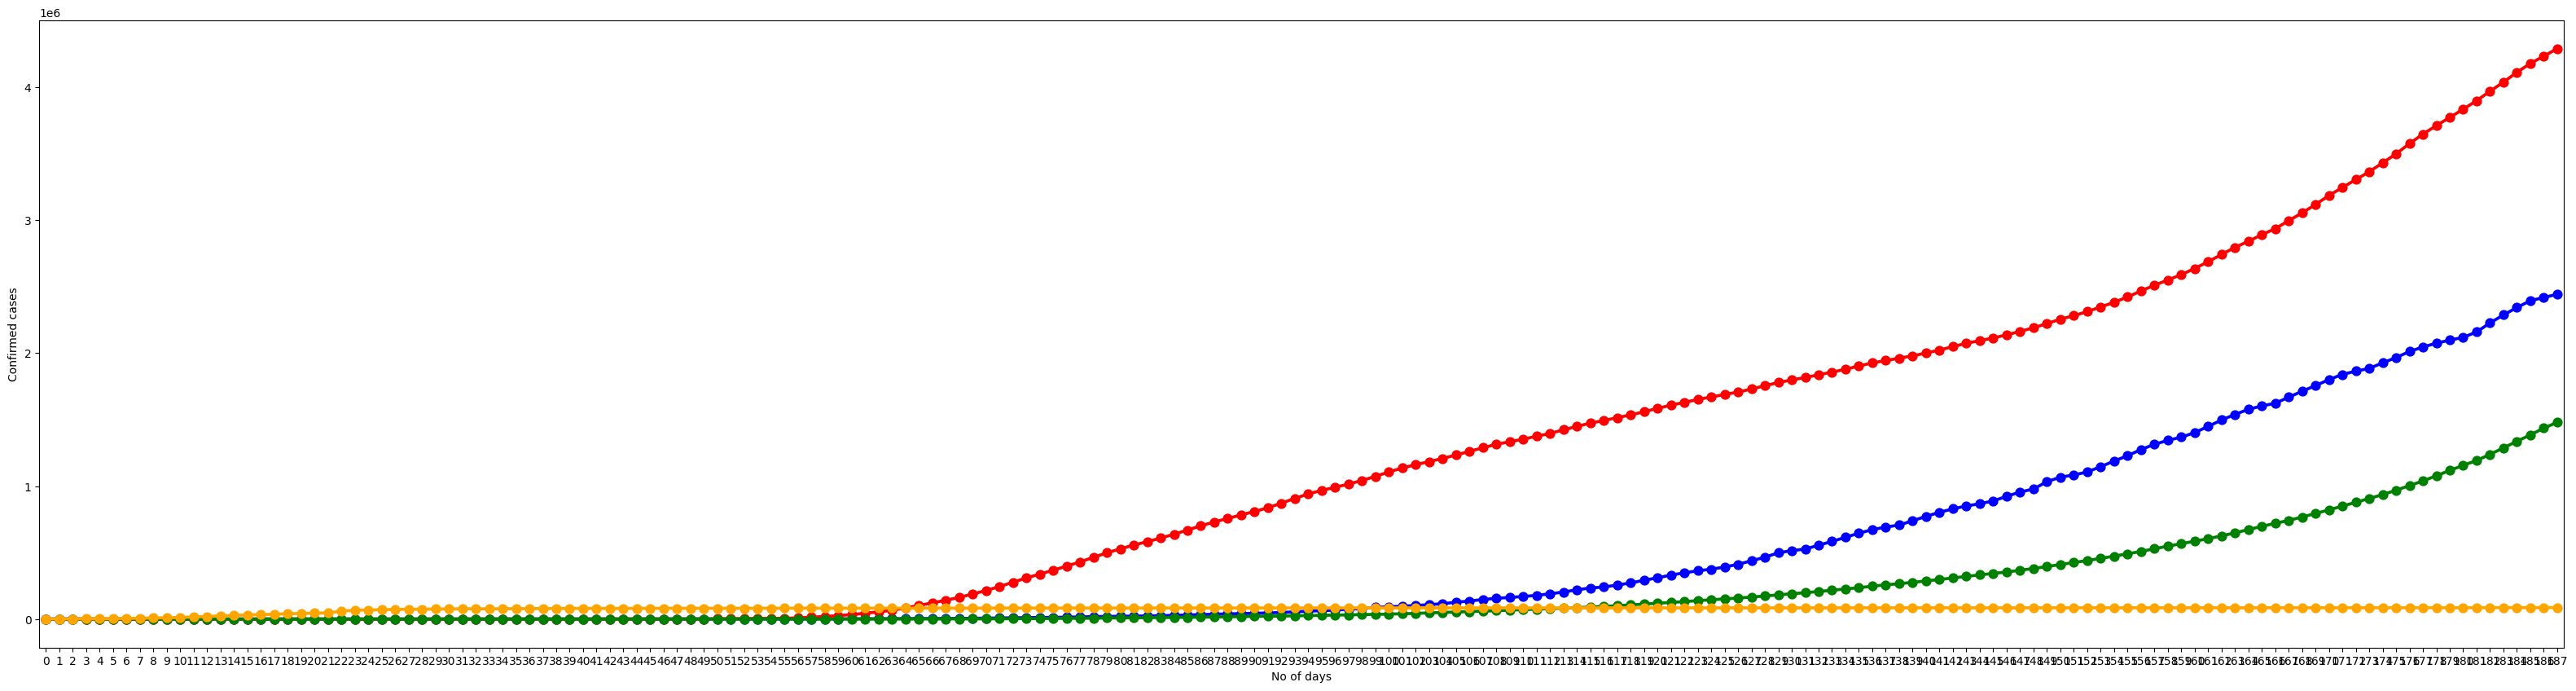

In [85]:
plt.figure(figsize = (40,10))
sns.pointplot( x = brazil.index , y = brazil.confirmed , color = "Blue")
sns.pointplot( x = us.index , y = us.confirmed , color = "Red")
sns.pointplot( x = india.index , y = india.confirmed , color = "Green")
sns.pointplot( x = china.index , y = china.confirmed , color = "Orange")

plt.xlabel("No of days")
plt.ylabel("Confirmed cases")